# 이미지 데이터 증강(Image Data Augmentation)
- 이미지 데이터셋을 확장하고 모델의 일반화 성능을 높이기 위해 원본 이미지에서 다양한 변형을 생성하는 기법
- 이 과정은 모델이 제한된 데이터셋으로 학습하더라도 더 많은 양의 데이터를 활용하는 효과를 줄 수 있음
- 이미지 증강을 통해 데이터셋의 크기가 증가하고 다양성이 높아져, 모델이 오버피팅을 줄이고 예측 성능을 개선할 수 있음
- 주요 이미지 증강 방법
    - 회전(Rotation)
    > 이미지를 임의의 각도로 회전시켜 다양한 각도에서 물체를 학습할 수 있도록 한다.
    - 수평/수직 뒤집기(Flipping)
    > 이미지의 좌우나 상하를 뒤집어 다양한 시각에서 학습을 촉진한다.
    - 자르기(Cropping)
    > 이미지의 일부를 잘라내어 모델이 물체의 일부분만으로도 인식할 수 있도록 도와준다.
    - 크기 조정(Scaling)
    > 이미지를 크거나 작게 확대 및 축소하여 다양한 비율의 객체를 학습할 수 있도록 한다.
    - 색상 조정(Color Jittering)
    > 색상, 밝기, 대비를 변경하여 조명이나 환경이 달라지는 상황에 대한 견고성을 높인다.
    - 노이즈 추가(Adding Noise)
    > 이미지에 랜덤 노이즈를 추가하여 모델이 데이터의 잡음에도 강인하도록 학습한다.

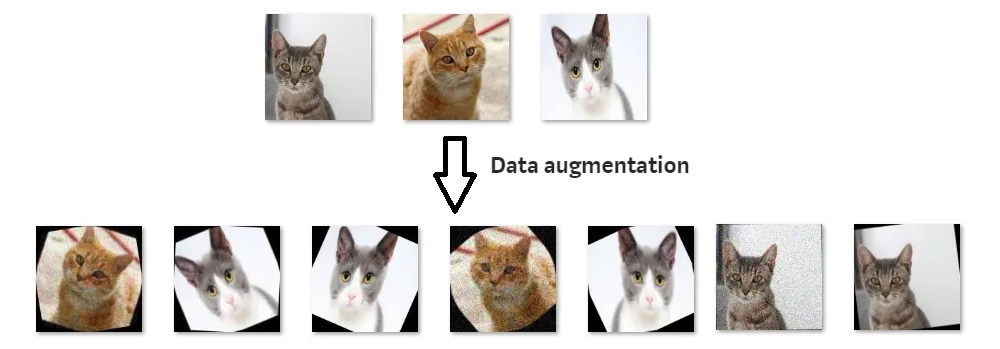

In [24]:
!gdown 1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
!unzip -oqq cats_and_dogs.zip

Downloading...
From (original): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
From (redirected): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga&confirm=t&uuid=b7d48cba-7753-4c26-aaa2-036c5df378a2
To: /content/cats_and_dogs.zip
100% 90.8M/90.8M [00:01<00:00, 66.8MB/s]


In [25]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [26]:
SEED = 42

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
from glob import glob

In [28]:
cats_list = sorted(glob("train/cats/*.jpg"))
dogs_list = sorted(glob("train/dogs/*.jpg"))

len(cats_list), len(dogs_list)

(1000, 1000)

- 정답 데이터 만들기
    - 고양이: 0
    - 개 : 1
    

In [29]:
img_path = cats_list + dogs_list
labels = [0] * 1000 + [1] * 1000

train_path = np.array(img_path)
target = np.array(labels)

In [30]:
train_path

array(['train/cats/cat.0.jpg', 'train/cats/cat.1.jpg',
       'train/cats/cat.10.jpg', ..., 'train/dogs/dog.997.jpg',
       'train/dogs/dog.998.jpg', 'train/dogs/dog.999.jpg'], dtype='<U22')

In [31]:
target

array([0, 0, 0, ..., 1, 1, 1])

# 섞기

In [32]:
np.random.seed(SEED)
idx_list = np.arange(train_path.shape[0])

np.random.shuffle(idx_list)
np.random.shuffle(idx_list)

train_path = train_path[idx_list]
target = target[idx_list]

- 이진분류 문제에서 주의할 점(pytorch)
    - 정답데이터는 2차원 형태이고, 데이터 타입은 float32 형태 여야 한다.

In [33]:
target = target.reshape(-1,1)
target.shape

(2000, 1)

In [34]:
import cv2
img = cv2.imread(train_path[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# albumentations 라이브러리

- 설치하기
```
pip install albumentations
```

In [35]:
import albumentations as A

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [36]:
from albumentations.pytorch import ToTensorV2

## ToTensorV2 클래스
- 이미지 데이터를 C X H X W 형태의 텐서로 변환
- ndarray를 전달해야함
- 스케일 안해줌

In [37]:
aug = ToTensorV2()
aug(image = img) # 키워드 아규먼트 전달 방식으로 전달해야함

{'image': tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)}

In [38]:
aug(image=img)['image'].shape

torch.Size([3, 500, 460])

## Normalize 클래스
- 정규화를 해준다
- img = (img - mean * 255 ) / std*255)

In [39]:
aug = A.Normalize()
aug(image=img)["image"]

array([[[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       ...,

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285

- minmax scailing

In [40]:
aug = A.Normalize(mean=0, std=1)
aug(image = img)['image']

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

## Resize 클래스

In [41]:
aug = A.Resize(150,150) # h, w
aug(image = img)

{'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
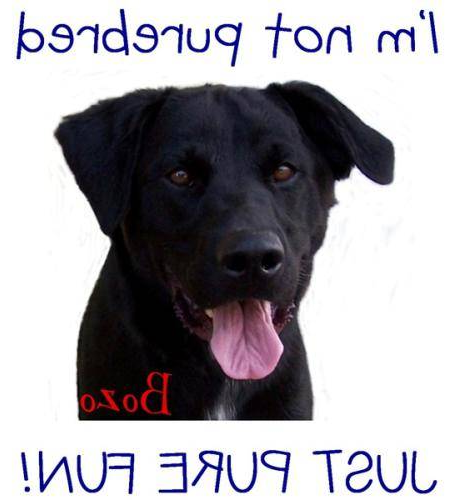

In [42]:
aug = A.HorizontalFlip(p=1)
aug(image=img)['image']

## VerticalFlip
- 상하반전

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
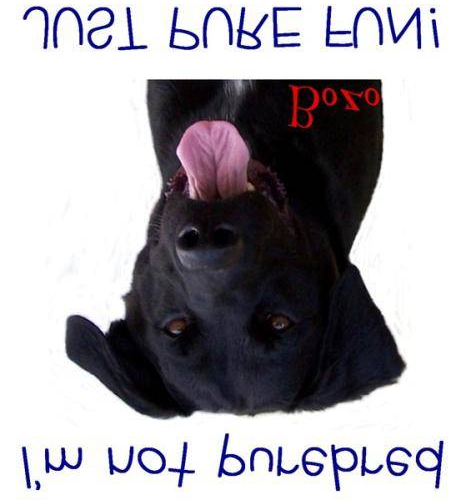

In [43]:
aug = A.VerticalFlip(p=1)
aug(image=img)['image']

## ToGray

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
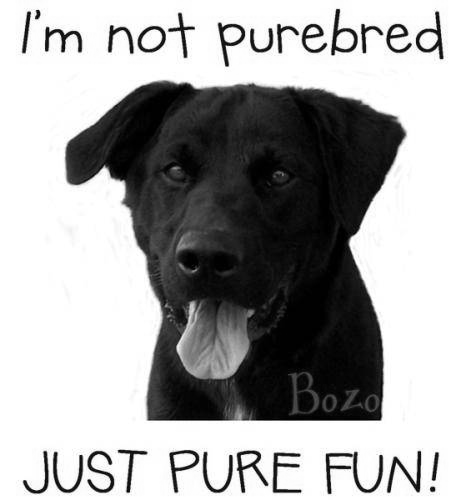

In [44]:
aug = A.ToGray(p=1)
aug(image=img)['image']

array([[[254, 255, 246],
        [254, 255, 249],
        [254, 254, 251],
        ...,
        [251, 251, 252],
        [249, 248, 253],
        [248, 245, 255]],

       [[254, 255, 250],
        [254, 254, 252],
        [254, 254, 253],
        ...,
        [246, 246, 249],
        [245, 245, 252],
        [245, 244, 255]],

       [[254, 254, 253],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [251, 251, 253],
        [244, 244, 254],
        [231, 231, 252]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [136,  19,  11],
        [109,  14,   4],
        [ 85,  10,   0]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [111,  13,   8],
        [ 83,   8,   3],
        [ 59,   5,   0]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 91,   7,   6],
        [ 64,   4,   2],
        [ 43,   2,   0]]], dtype=uint8)
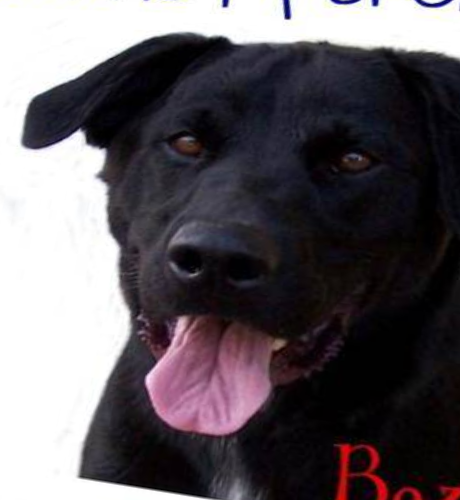

In [45]:
aug = A.Perspective(p=1)
aug(image=img)['image']

In [46]:
# aug = A.lmvertimg(p=1)
# aug(image=img)['image']

## Posterize
- 이미지 포스터화
- num_bits 파라미터로 되어있음

array([[[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       ...,

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]]], dtype=uint8)
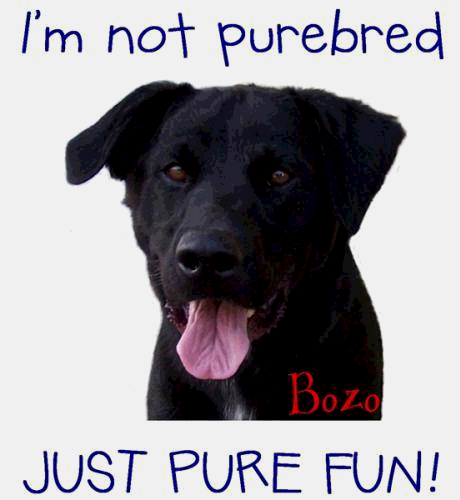

In [47]:
aug = A.Posterize(p=1)
aug(image=img)['image']

## Equalize
- 이미지 히스토그램 균등화

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
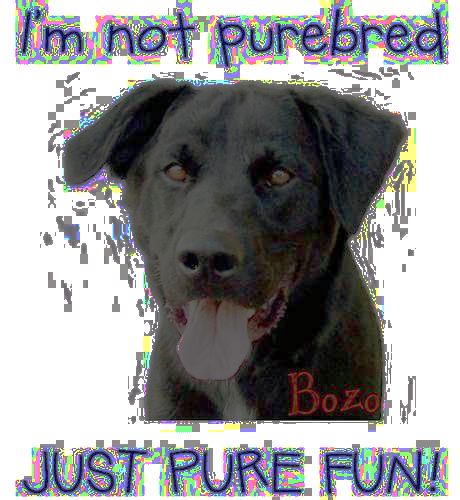

In [48]:
aug = A.Equalize(p=1)
aug(image=img)['image']

## CenterCrop

array([[[  4,   3,   9],
        [  4,   3,   9],
        [  4,   3,   9],
        ...,
        [  5,   4,  10],
        [  7,   6,  12],
        [ 12,  11,  17]],

       [[  4,   3,   9],
        [  4,   3,   9],
        [  4,   3,   9],
        ...,
        [  6,   5,  11],
        [  2,   1,   7],
        [  8,   7,  13]],

       [[  5,   4,  10],
        [  5,   4,  10],
        [  5,   4,  10],
        ...,
        [  7,   6,  12],
        [  6,   5,  11],
        [  8,   7,  13]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   5,   6],
        [  9,   7,   8],
        [  9,   7,   8]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  5,   3,   4],
        [  9,   7,   8],
        [  8,   6,   7]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  5,   3,   4],
        [  8,   6,   7],
        [  8,   6,   7]]], dtype=uint8)
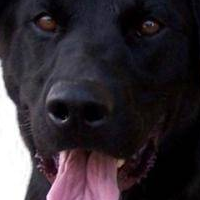

In [49]:
aug = A.CenterCrop(200,200, p=1)
aug(image=img)['image']

## A.RandomResizedCrop

array([[[247, 245, 255],
        [250, 253, 255],
        [247, 254, 242],
        ...,
        [ 22,  19,  99],
        [ 19,  16, 103],
        [  6,   4,  82]],

       [[251, 249, 255],
        [251, 254, 255],
        [251, 255, 244],
        ...,
        [ 11,   9, 100],
        [ 15,  14,  99],
        [ 37,  37, 101]],

       [[254, 253, 255],
        [249, 252, 253],
        [248, 255, 240],
        ...,
        [ 10,   8,  97],
        [ 40,  41, 109],
        [136, 141, 178]],

       ...,

       [[ 10,  13,  11],
        [ 10,  13,  11],
        [ 13,  12,  12],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  9,  11,   8],
        [ 10,  11,   8],
        [ 11,  11,   9],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  6,   7,   3],
        [  7,   8,   3],
        [  7,   8,   4],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
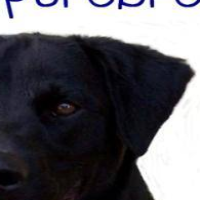

In [50]:
aug = A.RandomResizedCrop([200,200], p=1)
aug(image=img)['image']

## A.Affine

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
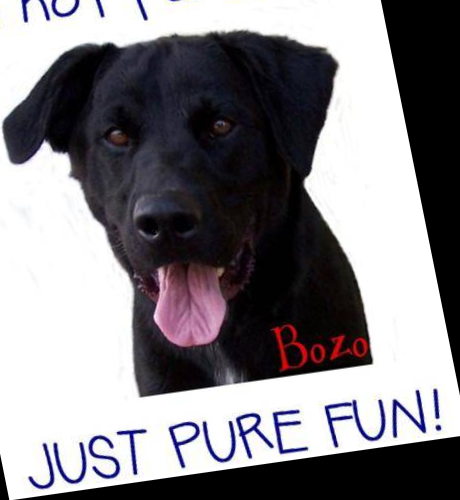

In [51]:
aug = A.Affine(p=1)
aug(image=img)['image']

# 훈련데이터 , 테스트 데이터 증강하는 코드

In [52]:
resize = [150,150] # h, w
# 이미지변환 → 크기 조정 → 정규화 → 텐서로 변환
train_lst = [
    A.HorizontalFlip(p=0.5), # 50% 확률로 이미지 변환 (증강효과)
    A.Posterize(p=1),
    A.RandomResizedCrop([200,200], p=0.5),
    A.Affine(p=0.5),
    A.Resize(*resize), # 리사이징
    A.Normalize(), # 정규화
    ToTensorV2() # 텐서변환 (C * H * W)
]

test_lst = [
    A.Resize(*resize), # 리사이징
    A.Normalize(), # 정규화
    ToTensorV2() # 텐서변환 (C * H * W)
]

# A.Compose : 여러 이미지 변환(증강)을 순서대로 묶어서 실행하는 도구
train_trans = A.Compose(train_lst)
test_trans = A.Compose(test_lst)

In [53]:
train_trans(image=img)

{'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ...,  1.9920,  1.9920,  1.9920],
          [-2.1179, -2.1179, -2.1179,  ...,  1.9920,  1.9920,  1.9920],
          [-2.1179, -2.1179, -2.1179,  ...,  1.9920,  1.9920,  1.9920]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ...,  2.1660,  2.1660,  2.1660],
          [-2.0357, -2.0357, -2.0357,  ...,  2.1660,  2.1660,  2.1660],
          [-2.0357, -2.0357, -2.0357,  ...,  2.1660,  2.1660,  2.1660]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

Compose 가 업섰다면 조건문도 줘야하고, 코드가 훨씬 가독성이 힘들어 진다.

# 데이터셋 클래스

In [54]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self,transfrom , x, y=None):
        self.x = x
        self.y = y
        self.transfrom = transfrom

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, i):
        item = {}
        x = cv2.imread(self.x[i])
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        item["x"] = self.transfrom(image = x)['image']
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [55]:
dt= CatDogDataset(train_trans, train_path, target)
dl = torch.utils.data.DataLoader(dt, batch_size = 2)
batch = next(iter(dl))
batch

{'x': tensor([[[[ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920],
           [ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920],
           [ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920],
           ...,
           [ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920],
           [ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920],
           [ 1.9920,  1.9920,  1.9920,  ...,  1.9920,  1.9920,  1.9920]],
 
          [[ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660],
           [ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660],
           [ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660],
           ...,
           [ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660],
           [ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660],
           [ 2.1660,  2.1660,  2.1660,  ...,  2.1660,  2.1660,  2.1660]],
 
          [[ 2.3786,  2.3786,  2.3786,  ...,  2.3786,  2.3786,  2.3786],
        

In [56]:
batch['x'].shape

torch.Size([2, 3, 150, 150])

In [57]:
batch['x'].dtype, batch['y'].dtype

(torch.float32, torch.float32)

# 모델 클래스

In [58]:
class Net(torch.nn.Module):
    def __init__(self, out_channel=16, kernel_size=3):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(3, out_channel, kernel_size),
            torch.nn.BatchNorm2d(out_channel),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.Conv2d(out_channel, out_channel*2, kernel_size),
            torch.nn.BatchNorm2d(out_channel*2),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.AdaptiveMaxPool2d(1), # batch, channel, height, width -> batch, channel, 1, 1
            torch.nn.Flatten(),  # batch, channel, 1, 1 -> batch, channel
            torch.nn.Linear(out_channel*2, 1) # output layer
        )

    def forward(self, x): # 채널이 이미 앞에 있어서 permute 할 필요가 없음 !
        return self.seq(x)

In [59]:
Net()(batch["x"])

tensor([[3.8741],
        [0.9239]], grad_fn=<AddmmBackward0>)

# 학습 loop 함수

In [60]:
def train_loop(dl, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train()
    for batch in dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device))

        optimizer.zero_grad() #이전 단계에서 계산된 기울기(gradient)를 0으로 초기화
        loss.backward() # 현재 손실값(loss)을 기준으로 모든 가중치에 대한 기울기 계산 (역전파)
        optimizer.step() # 계산된 기울기를 사용해 가중치를 업데이트

        epoch_loss += loss.item()

    epoch_loss /= len(dl)
    return epoch_loss

# 테스트 loop 함수

In [61]:
@torch.no_grad()
def test_loop(dl, model, loss_fn, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dl:
        pred = model( batch["x"].to(device) )
        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dl)
    return epoch_loss, pred

# 하이퍼파라미터

- 차원축소 이용해서 증강해보기.
- 너무 틀에박힌 생각에 있지말고 이것저것 할 수있는 방법 고민하면 남들과 다르게 하는게 가능하다

In [62]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [64]:
train_path

array(['train/dogs/dog.900.jpg', 'train/dogs/dog.314.jpg',
       'train/cats/cat.232.jpg', ..., 'train/dogs/dog.59.jpg',
       'train/cats/cat.169.jpg', 'train/dogs/dog.54.jpg'], dtype='<U22')

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
DATA_PATH = '/content/drive/MyDrive/멋쟁이사자차럼/data/'

In [69]:
is_holdout = False # 모든 fold 실행
reset_seeds(SEED) # 시드 고정
score_list = []
for i, (tri, vai) in enumerate(cv.split(train_path)):  # cv.split(train_path) 훈련*검증 나누는 함수
    # 학습 데이터
    x_train = train_path[tri]
    y_train = target[tri]
    train_dt = CatDogDataset(train_trans, x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    # 검증 데이터
    x_valid = train_path[vai]
    y_valid = target[vai]
    valid_dt = CatDogDataset(test_trans, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net().to(device) # 모델 생성
    optimizer = torch.optim.Adam( model.parameters() ) # 옵티마이저 사용해서 파라미터 업데이트

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고점수
    for _ in range(epochs):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device) # 학습 데이터를 이용해 모델을 학습
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred > 0.5).astype(int) # 값이 0.5 이상이면 1
        score = accuracy_score(y_valid, pred)
        patience += 1

        if score > best_score:
            best_score = score
            patience = 0
            torch.save( model.state_dict(), f"{DATA_PATH}model{i}.pt" )

        if patience == 10:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    if is_holdout:
        break

ACC 최고점수: 0.755
ACC 최고점수: 0.7375
ACC 최고점수: 0.8025
ACC 최고점수: 0.735
ACC 최고점수: 0.8175


In [70]:
np.mean(score_list)

0.7695

- test 데이터에 대해도 검증해보기

In [71]:
cats_test_list = sorted( glob("test/cats/*.jpg") ) # 0
dogs_test_list = sorted( glob("test/dogs/*.jpg") ) # 1

test_path = np.array(cats_test_list + dogs_test_list)
test_path

array(['test/cats/cat.1000.jpg', 'test/cats/cat.1001.jpg',
       'test/cats/cat.1002.jpg', ..., 'test/dogs/dog.1997.jpg',
       'test/dogs/dog.1998.jpg', 'test/dogs/dog.1999.jpg'], dtype='<U22')

In [72]:
y_test = np.array([0] * len(cats_test_list) + [1] * len(dogs_test_list))
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [73]:
test_dt = CatDogDataset(test_trans, test_path)
test_dl = torch.utils.data.DataLoader(test_dt, shuffle=False, batch_size=batch_size)

In [75]:
pred_list = []
for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(f"{DATA_PATH}model{i}.pt", weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, None, device)
    pred_list.append(pred)

In [76]:
pred = np.mean(pred_list, axis=0)
pred = (pred > 0.5).astype(int)
pred.shape

(2000, 1)

In [77]:
accuracy_score(y_test, pred)

0.7725

# TTA (Test Time Augmentation )
- 막판에 쥐어 짜낼때 하는거!!!!!!!!!!!!!!
- 예측단계에서 증강하기
- 딥러닝 모델의 성능을 향상시키기 위해 테스트 단계에서 이미지에 다양한 변형을 가하는 기법
- 테스트 이미지를 직접 증강을 적용하여 예측하는 기법

In [88]:
aug_list = [A.HorizontalFlip(p=1), A.Affine(p=1), A.Equalize(p=1), A.Posterize(p=1)] # 이거 개수만큼 반복함

In [93]:
tta_pred_list = []
for aug_obj in aug_list:
    lst = [
        aug_obj,
        A.Resize(*resize),
        A.Normalize(),
        ToTensorV2()
    ]

    trans = A.Compose(lst)
    test_dt = CatDogDataset(trans, test_path)
    test_dl = torch.utils.data.DataLoader(test_dt, shuffle=False, batch_size=batch_size)
    for i in range(n_splits):
        model = Net().to(device)
        state_dict = torch.load(f"{DATA_PATH}model{i}.pt", weights_only=True)
        model.load_state_dict(state_dict)

        _, pred = test_loop(test_dl, model, None, device)
        tta_pred_list.append(pred)

In [94]:
len(pred_list + tta_pred_list)

25

In [95]:
preds = pred_list + tta_pred_list

In [96]:
pred = np.mean(preds, axis=0)
pred = np.where(pred > 0.5, 1, 0)
pred.shape

(2000, 1)

In [97]:
accuracy_score(y_test,pred)

0.7795